<a href="https://colab.research.google.com/github/dimpalsonawane08/Frauddetection/blob/main/fraud_detction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_recall_curve

In [ ]:
from google.colab import files

# Use the GUI to upload a file
uploaded = files.upload()


Saving fraud detection.zip to fraud detection (1).zip


In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/fraud detection (1).zip')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Display the first few rows of the dataset
print(dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Display class distribution
print(dataset['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


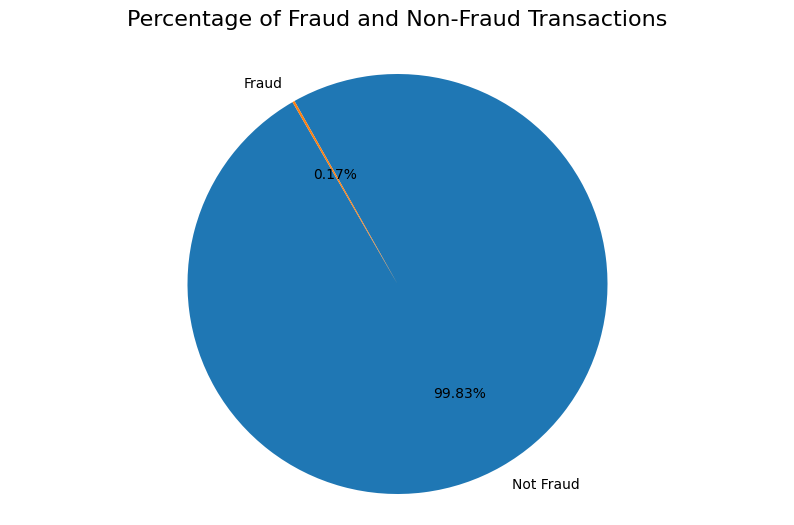

In [ ]:
# Visualize the percentage of Fraud and Non-Fraud transactions
labels = 'Not Fraud', 'Fraud'
sizes = [dataset.Class[dataset['Class'] == 0].count(), dataset.Class[dataset['Class'] == 1].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)
ax1.axis('equal')
title = "Percentage of Fraud and Non-Fraud Transactions"
plt.title(title, size=16, pad=20)
plt.show()

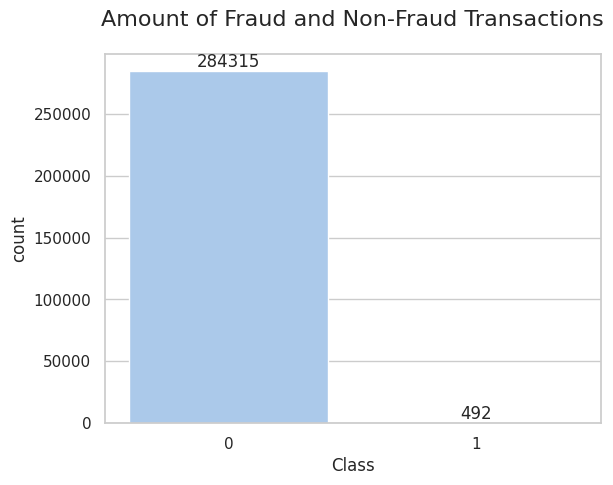

In [ ]:
# Visualize the amount of Fraud and Non-Fraud transactions
sns.set(style="whitegrid")
ax = sns.countplot(x='Class', data=dataset, order=[0, 1], label='Count', palette='pastel')
counts = dataset['Class'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
title = "Amount of Fraud and Non-Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)
plt.show()

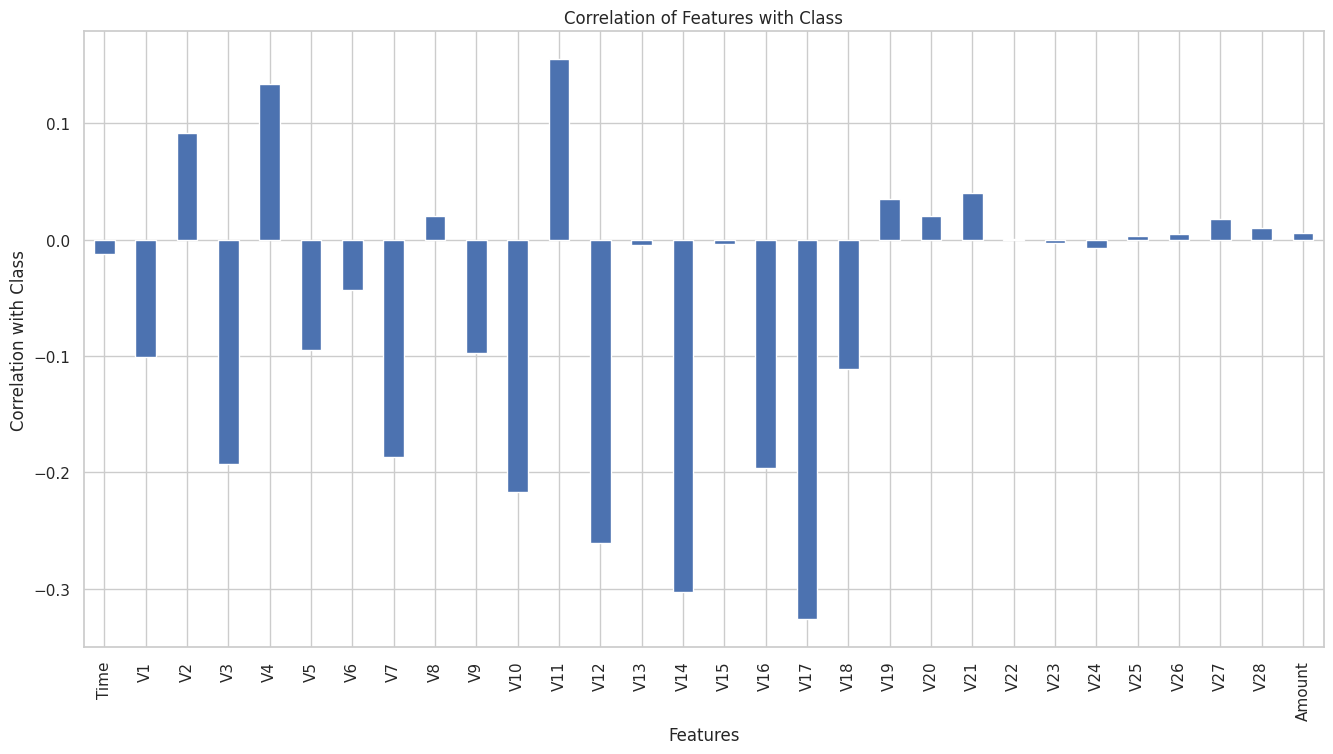

In [ ]:
# Correlation Diagram
dataset_2 = dataset.drop(columns=['Class'])
correlation_with_class = dataset_2.corrwith(dataset['Class'])
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Features with Class")
plt.show()

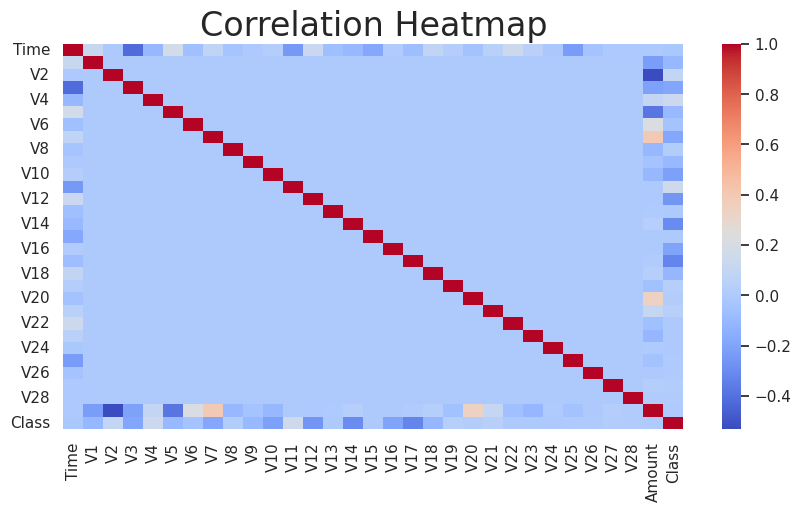

In [ ]:
# Heatmap
corr = dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

In [ ]:
# Splitting the data
x = dataset.drop(columns=['Class'])  # Features
y = dataset['Class']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Data Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# **Building the Model**

In [ ]:
# Model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
7121/7121 [==============================] - 48s 7ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 49s 7ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/10
7121/7121 [==============================] - 46s 6ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 47s 7ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 5/10
7121/7121 [==============================] - 47s 7ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 48s 7ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 7/10
7121/7121 [==============================] - 50s 7ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0027 - val_ac

In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1781/1781 [==============================] - 6s 3ms/step - loss: 0.0030 - accuracy: 0.9995
Test Loss: 0.0030197289306670427
Test Accuracy: 0.9995084404945374


In [ ]:
# Predictions and evaluation metrics
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1781/1781 [==============================] - 5s 3ms/step


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56851    10]
 [   18    83]]


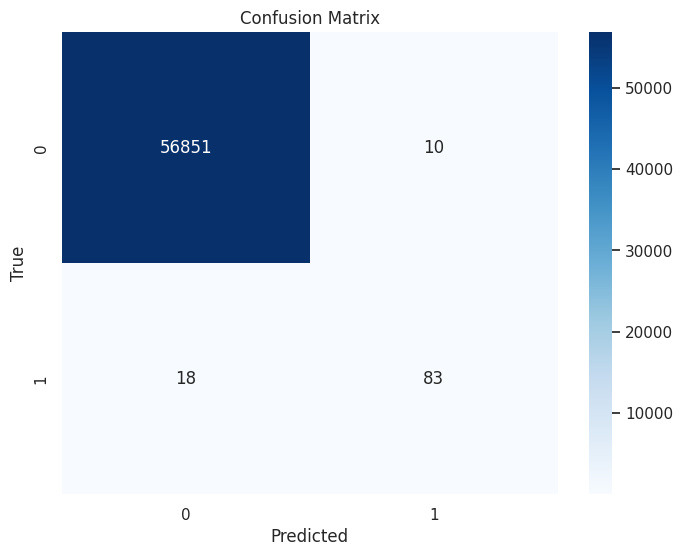

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Accuracy Score
acc_cm = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_cm)

Accuracy: 0.9995084442259752


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.89      0.82      0.86       101

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



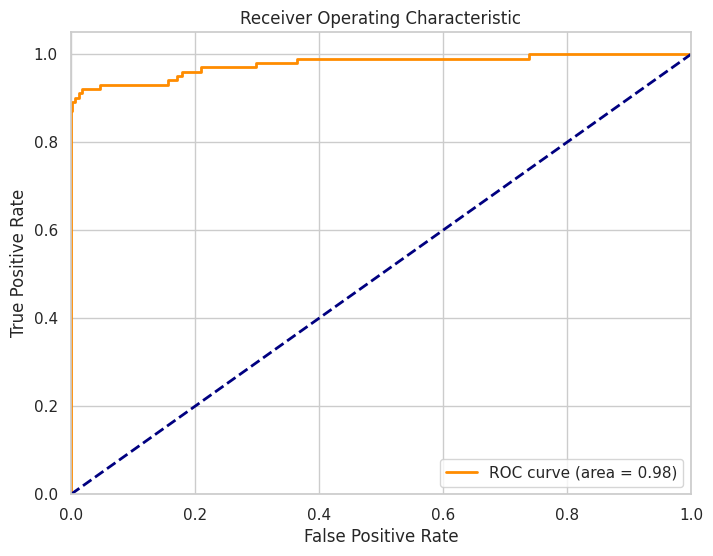

AUC Score: 0.9781410669513514


In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)

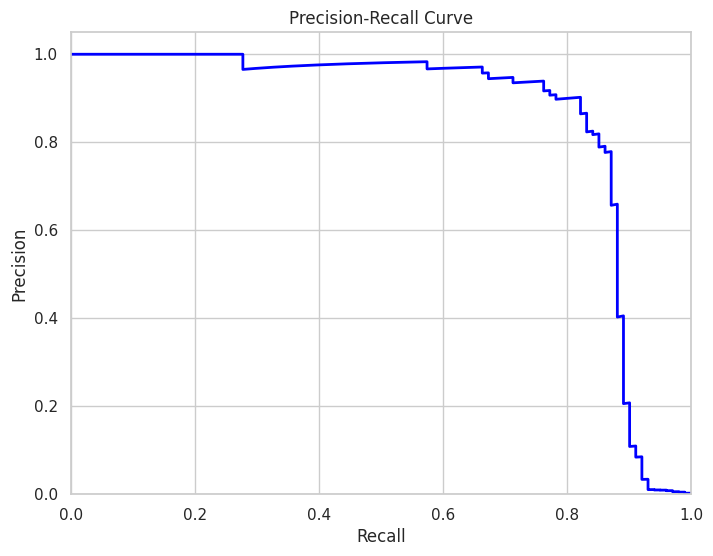

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()